# Dataset - Telco Customer Churn

O dataset Telco Customer Churn, disponibilizado pela IBM, contém informações sobre clientes de uma empresa de telecomunicações e é utilizado para a análise e previsão do fenômeno de churn, ou seja, o cancelamento de serviços pelos clientes. Composto por 7.043 instâncias e 20 atributos, este conjunto de dados inclui tanto variáveis categóricas quanto numéricas, englobando aspectos como dados demográficos, informações contratuais, uso de serviços e valores monetários. A variável-alvo, Churn, classifica os clientes como aqueles que cancelaram ou não os serviços da empresa.

Entre as variáveis presentes no dataset, destacam-se informações como gender, SeniorCitizen, tenure, Contract, PaymentMethod, MonthlyCharges, e TotalCharges, que fornecem uma visão detalhada dos clientes e do relacionamento contratual com a empresa. No entanto, algumas colunas, como a TotalCharges, exigem pré-processamento adicional devido a inconsistências no tipo de dado.

Este dataset é amplamente utilizado para a construção de modelos preditivos de classificação binária, permitindo a análise de fatores que influenciam o churn dos clientes e contribuindo para a otimização de estratégias empresariais no setor de telecomunicações.

Features

1. gender
→ Gênero do cliente (masculino ou feminino).

2. SeniorCitizen
→ Se o cliente é idoso (1 = Sim, 0 = Não).

3. Partner
→ Se o cliente tem parceiro/parceira (Sim ou Não).

4. Dependents
→ Se o cliente tem dependentes (filhos, outros familiares).

5. tenure
→ Tempo de permanência na empresa (em meses).

6. PhoneService
→ Se o cliente possui serviço de telefone (Sim ou Não).

7. MultipleLines
→ Se o cliente possui múltiplas linhas telefônicas (Sim, Não ou Não possui serviço telefônico).

8. InternetService
→ Tipo de serviço de internet (DSL, fibra ótica ou nenhum).

9. OnlineSecurity
→ Se o cliente possui segurança online (proteção contra vírus).

10. OnlineBackup
→ Se o cliente possui serviço de backup online.

11. DeviceProtection
→ Se o cliente possui proteção para seus dispositivos (manutenção, suporte).

12. TechSupport
→ Se o cliente possui suporte técnico.

13. StreamingTV
→ Se o cliente possui serviço de streaming de TV.

14. StreamingMovies
→ Se o cliente possui serviço de streaming de filmes.

15. Contract
→ Tipo de contrato do cliente (mensal, anual, bianual).

16. PaperlessBilling
→ Se o cliente recebe a fatura apenas online (sem papel).

17. PaymentMethod
→ Método de pagamento (boleto eletrônico, cheque enviado, débito automático, cartão de crédito automático).

18. MonthlyCharges
→ Valor da fatura mensal do cliente (em dólares).

19. TotalCharges
→ Valor total pago pelo cliente até o momento (em dólares).

20. Churn
→ Se o cliente cancelou o serviço (Sim = cancelou, Não = ainda está ativo).

A análise exploratória de dados foi conduzida de acordo com a natureza e a estrutura dos dados apresentados. Cada tipo de dataframe, necessita de uma abordagem específica, considerando suas características.

# 1. Importação dos dados

## 1.1. Importação

In [67]:
import pandas as pd

matriz = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

## 1.2. Características do dataset bruto

In [68]:
# Informações básicas
print(f"Número de instâncias: {matriz.shape[0]}")
print(f"Número de colunas: {matriz.shape[1]}\n")

print("Colunas e tipos de variáveis:")
print("-" * 50)

# Percentual para definir "poucas categorias"
limite_categoria = 0.10 * matriz.shape[0]  # 10% do número de instâncias

# Para cada coluna
for coluna in matriz.columns:
    tipo = matriz[coluna].dtype

    if pd.api.types.is_numeric_dtype(matriz[coluna]):
        print(f"🔹 {coluna}: Numérica")

    elif pd.api.types.is_object_dtype(matriz[coluna]) or pd.api.types.is_categorical_dtype(matriz[coluna]):
        n_categorias = matriz[coluna].nunique()
        print(f"🔸 {coluna}: Categórica ({n_categorias} categorias)")

        # Se o número de categorias for pequeno (menos de 10% do total de instâncias)
        if n_categorias <= limite_categoria:
            categorias = matriz[coluna].unique()
            print(f"    Categorias: {categorias}")

    else:
        print(f"🔹 {coluna}: Tipo especial ({tipo})")

print("-" * 50)

Número de instâncias: 7043
Número de colunas: 21

Colunas e tipos de variáveis:
--------------------------------------------------
🔸 customerID: Categórica (7043 categorias)
🔸 gender: Categórica (2 categorias)
    Categorias: ['Female' 'Male']
🔹 SeniorCitizen: Numérica
🔸 Partner: Categórica (2 categorias)
    Categorias: ['Yes' 'No']
🔸 Dependents: Categórica (2 categorias)
    Categorias: ['No' 'Yes']
🔹 tenure: Numérica
🔸 PhoneService: Categórica (2 categorias)
    Categorias: ['No' 'Yes']
🔸 MultipleLines: Categórica (3 categorias)
    Categorias: ['No phone service' 'No' 'Yes']
🔸 InternetService: Categórica (3 categorias)
    Categorias: ['DSL' 'Fiber optic' 'No']
🔸 OnlineSecurity: Categórica (3 categorias)
    Categorias: ['No' 'Yes' 'No internet service']
🔸 OnlineBackup: Categórica (3 categorias)
    Categorias: ['Yes' 'No' 'No internet service']
🔸 DeviceProtection: Categórica (3 categorias)
    Categorias: ['No' 'Yes' 'No internet service']
🔸 TechSupport: Categórica (3 categorias)


## 1.3. Visualização da matriz

In [69]:
# Visualização da matriz
matriz.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


# 2. Entendimento inicial do dataset

## 2.1. Removendo coluna de customerID

A coluna 'customerID' deve ser removida da análise porque ela funciona apenas como um identificador único para cada cliente e não carrega nenhuma informação útil para os modelos de machine learning. Como possui 7043 categorias distintas (uma para cada instância), ela não contribui para padrões ou relações entre as variáveis e pode até prejudicar o desempenho do modelo ao introduzir ruído ou complexidade desnecessária. Mantê-la pode levar o modelo a aprender associações espúrias que não se repetem em novos dados.

In [70]:
#Remover primeira coluna
matriz = matriz.drop(columns=['customerID'])

## 2.2. Atualização dos nomes das colunas

Visualização dos nomes da colunas atuais

In [71]:
# Nome das colunas
matriz.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## 2.3. Informações numéricas sobre a matriz

Informações:
* Número total de entradas (linhas)
* Número de colunas
* Nome de cada coluna
* Quantidade de valores não nulos em cada coluna
* Tipo de dado de cada coluna (int64, float64, object, etc.)
* Uso de memória aproximado

In [72]:
matriz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


## 2.4. Quantidade de valores nulos

Exibir a quantidade de valores nulos por cada coluna da matriz

In [73]:
# Quantidade de valores nulos.
matriz.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## 2.5. Presença de valores inválidos

Nesta subseção são feitas as seguintes tarefas:
* A presença de "NaN" e "?" por coluna
* Identificação de valores suspeitos (espaços em branco)
* Remoção das linhas com valores ausentes
* Identificação das colunas que parecem ser numéricas, mas estão como objeto (texto)
* Conversão das colunas "object" para "float"

### 2.5.1 Presença de "NaN" e "?"

In [74]:
# Para cada coluna
  # Coluna: nome
  # Tipo: categórica, binária, numérica inteira, etc.
  # Se possui valores NaN
  # Se possui o caractere "?" (muito usado como marcador de valor ausente)

# Função para analisar coluna
def analisar_coluna(col):
    serie = matriz[col]
    tipo_dado = serie.dtype
    valores_unicos = serie.dropna().unique()
    num_unicos = len(valores_unicos)

    # Detecta se há '?'
    possui_interrogacao = serie.astype(str).str.contains(r'^\?$').any()

    # Define tipo da variável
    if tipo_dado == 'object':
        if num_unicos == 2:
            tipo_variavel = 'Binária (categórica)'
        else:
            tipo_variavel = 'Categórica'
        escala = f"Categorias: {list(valores_unicos)}"
    elif pd.api.types.is_numeric_dtype(serie):
        if num_unicos == 2:
            tipo_variavel = 'Binária (numérica)'
        elif pd.api.types.is_integer_dtype(serie):
            tipo_variavel = 'Numérica inteira'
        else:
            tipo_variavel = 'Numérica contínua'
        escala = f"Valores entre {serie.min()} e {serie.max()}"
    else:
        tipo_variavel = 'Outro'
        escala = 'Não identificado'

    possui_nan = serie.isna().any()

    return {
        'Tipo': tipo_variavel,
        'Escala': escala,
        'Possui NaN': possui_nan,
        'Possui "?"': possui_interrogacao
    }

# Analisa todas as colunas
analise_completa = {col: analisar_coluna(col) for col in matriz.columns}

# Exibe o resultado de forma organizada
for col, info in analise_completa.items():
    print(f"\nColuna: {col}")
    for chave, valor in info.items():
        print(f"  {chave}: {valor}")


Coluna: gender
  Tipo: Binária (categórica)
  Escala: Categorias: ['Female', 'Male']
  Possui NaN: False
  Possui "?": False

Coluna: SeniorCitizen
  Tipo: Binária (numérica)
  Escala: Valores entre 0 e 1
  Possui NaN: False
  Possui "?": False

Coluna: Partner
  Tipo: Binária (categórica)
  Escala: Categorias: ['Yes', 'No']
  Possui NaN: False
  Possui "?": False

Coluna: Dependents
  Tipo: Binária (categórica)
  Escala: Categorias: ['No', 'Yes']
  Possui NaN: False
  Possui "?": False

Coluna: tenure
  Tipo: Numérica inteira
  Escala: Valores entre 0 e 72
  Possui NaN: False
  Possui "?": False

Coluna: PhoneService
  Tipo: Binária (categórica)
  Escala: Categorias: ['No', 'Yes']
  Possui NaN: False
  Possui "?": False

Coluna: MultipleLines
  Tipo: Categórica
  Escala: Categorias: ['No phone service', 'No', 'Yes']
  Possui NaN: False
  Possui "?": False

Coluna: InternetService
  Tipo: Categórica
  Escala: Categorias: ['DSL', 'Fiber optic', 'No']
  Possui NaN: False
  Possui "?": F

### 2.5.2. Identificar valores suspeitos: espaços em branco

In [75]:
# Identificar valores suspeitos: espaços em branco
print("\nAnalisando valores suspeitos (espaços em branco ou strings vazias):")
for coluna in matriz.columns:
    if matriz[coluna].dtype == 'object':
        qtde_brancos = (matriz[coluna].str.strip() == '').sum()
        if qtde_brancos > 0:
            print(f"- {coluna}: {qtde_brancos} valores em branco")


Analisando valores suspeitos (espaços em branco ou strings vazias):
- TotalCharges: 11 valores em branco


### 2.5.3. Remoção dos espaços vazios

In [76]:
# Remover linhas com valores ausentes (NaN) - string
matriz = matriz[matriz['TotalCharges'] != '']

# Remover linhas com valores ausentes (NaN) na coluna 'TotalCharges'
matriz = matriz.dropna(subset=['TotalCharges'])

# Verificar se as linhas com NaN foram removidas
print("\nLinhas com valores ausentes em 'TotalCharges' foram removidas:")
print(matriz.isnull().sum())



Linhas com valores ausentes em 'TotalCharges' foram removidas:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


### 2.5.4. Colunas que parecem ser numéricas

In [77]:
import pandas as pd

# Verificar colunas que estão como texto, mas deveriam ser numéricas
possiveis_numericas = []

for coluna in matriz.columns:
    if matriz[coluna].dtype == 'object':
        # Limpa espaços e remove strings vazias
        serie_limpa = matriz[coluna].dropna().astype(str).str.strip()
        serie_filtrada = serie_limpa[serie_limpa != '']
        try:
            pd.to_numeric(serie_filtrada, errors='raise')
            possiveis_numericas.append(coluna)
        except Exception as e:
            print(f"Falha ao converter '{coluna}': {e}")

if possiveis_numericas:
    print("\nAs seguintes colunas estão como 'object', mas parecem ser numéricas:")
    for col in possiveis_numericas:
        print(f"- {col}")
else:
    print("\nNão foram encontradas colunas com suspeita de tipo errado.")


Falha ao converter 'gender': Unable to parse string "Female" at position 0
Falha ao converter 'Partner': Unable to parse string "Yes" at position 0
Falha ao converter 'Dependents': Unable to parse string "No" at position 0
Falha ao converter 'PhoneService': Unable to parse string "No" at position 0
Falha ao converter 'MultipleLines': Unable to parse string "No phone service" at position 0
Falha ao converter 'InternetService': Unable to parse string "DSL" at position 0
Falha ao converter 'OnlineSecurity': Unable to parse string "No" at position 0
Falha ao converter 'OnlineBackup': Unable to parse string "Yes" at position 0
Falha ao converter 'DeviceProtection': Unable to parse string "No" at position 0
Falha ao converter 'TechSupport': Unable to parse string "No" at position 0
Falha ao converter 'StreamingTV': Unable to parse string "No" at position 0
Falha ao converter 'StreamingMovies': Unable to parse string "No" at position 0
Falha ao converter 'Contract': Unable to parse string "Mo

### 2.5.5. Conversão da coluna "object" para "float"

A variável 'TotalCharges' deveria ser numérica, mas parece estar lida como texto/categórica.
Aqui, é feita a conversão da coluna para float.

In [78]:
# Corrigir a variável TotalCharges
import pandas as pd
matriz['TotalCharges'] = pd.to_numeric(matriz['TotalCharges'], errors='coerce')

# Verifica o tipo de dados da coluna
print(matriz['TotalCharges'].dtype)

float64


## 2.6. Verificação de colunas duplicadas

Esse código verifica se existem colunas duplicadas em um DataFrame — ou seja, colunas diferentes que têm exatamente os mesmos valores linha por linha. Ele faz isso comparando cada par de colunas entre si.

In [79]:
# Verificar colunas duplicadas
duplicadas = []
colunas = matriz.columns

for i in range(len(colunas)):
    for j in range(i + 1, len(colunas)):
        if matriz[colunas[i]].equals(matriz[colunas[j]]):
            duplicadas.append((colunas[i], colunas[j]))

# Exibe os pares de colunas duplicadas
for c1, c2 in duplicadas:
    print(f"Colunas '{c1}' e '{c2}' são duplicadas.")

## 2.7. Verificação de valores únicos

Esse código verifica quantos valores únicos existem em cada coluna do DataFrame matriz. Serve para:
* Identificar colunas constantes (com apenas 1 valor).
* Detectar colunas com alta cardinalidade (ex: IDs, nomes únicos).
* Avaliar colunas que podem precisar de tratamento especial (como transformação categórica, remoção ou codificação).

In [80]:
# Verificar valores únicos
valores_unicos = matriz.nunique()
print(valores_unicos)

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64


## 2.8. Verificar linhas duplicadas

Identificar linhas que estão duplicadas e remove-as mantendo a primeira.

In [81]:
#Detectar duplicatas - linhas
#Verifica se existem linhas repetidas no DataFrame:
duplicatas = matriz.duplicated()
print(matriz[duplicatas])

# Contar duplicatas - linhas
print(f"\nTotal de linhas duplicadas: {matriz.duplicated().sum()}")

# Remover duplicatas
# Remove as duplicatas mantendo a primeira ocorrência
matriz = matriz.drop_duplicates()

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
964     Male              0      No         No       1          Yes   
1338    Male              0      No         No       1          Yes   
1491  Female              0      No         No       1          Yes   
1739    Male              0      No         No       1          Yes   
1932    Male              0      No         No       1          Yes   
2713    Male              0      No         No       1          Yes   
2892    Male              0      No         No       1          Yes   
3301  Female              1      No         No       1          Yes   
3754    Male              0      No         No       1          Yes   
4098    Male              0      No         No       1          Yes   
4476  Female              0      No         No       1          Yes   
5506    Male              0      No         No       1          Yes   
5736    Male              0      No         No       1          Yes   
5759  

## 2.9. Verificar cardinalidade

A cardinalidade ajudar a identificar colunas que:
* São fáceis de codificar (baixa cardinalidade — poucos valores únicos, como "Sim"/"Não").
* Podem causar problemas (alta cardinalidade — muitos valores únicos, como "customerID", nomes ou códigos).
* Alta cardinalidade pode prejudicar modelos de machine learning, especialmente com codificações como one-hot (gera muitas colunas e risco de overfitting).
* Pode indicar colunas que devem ser removidas (como IDs).
* Ajuda na escolha da estratégia de pré-processamento (label encoding, hashing, etc.).

In [82]:
# Verificar cardinalidade
# Seleciona apenas colunas categóricas (strings/objetos)
colunas_categoricas = matriz.select_dtypes(include='object')

# Total de linhas no DataFrame
total_linhas = len(matriz)

print("Cardinalidade das variáveis categóricas:")
print()

# Para cada coluna categórica, calcula e avalia a cardinalidade
# Mais de 10% das linhas têm categorias diferentes é considerada alta cardinalidade
for coluna in colunas_categoricas.columns:
    unicos = matriz[coluna].nunique()
    proporcao = unicos / total_linhas
    status = "ALTA" if proporcao > 0.1 else "BAIXA"

    print(f"Coluna: {coluna}")
    print(f"  → Valores únicos: {unicos}")
    print(f"  → Proporção: {proporcao:.2%}")
    print(f"  → Cardinalidade: {status}")
    print()

Cardinalidade das variáveis categóricas:

Coluna: gender
  → Valores únicos: 2
  → Proporção: 0.03%
  → Cardinalidade: BAIXA

Coluna: Partner
  → Valores únicos: 2
  → Proporção: 0.03%
  → Cardinalidade: BAIXA

Coluna: Dependents
  → Valores únicos: 2
  → Proporção: 0.03%
  → Cardinalidade: BAIXA

Coluna: PhoneService
  → Valores únicos: 2
  → Proporção: 0.03%
  → Cardinalidade: BAIXA

Coluna: MultipleLines
  → Valores únicos: 3
  → Proporção: 0.04%
  → Cardinalidade: BAIXA

Coluna: InternetService
  → Valores únicos: 3
  → Proporção: 0.04%
  → Cardinalidade: BAIXA

Coluna: OnlineSecurity
  → Valores únicos: 3
  → Proporção: 0.04%
  → Cardinalidade: BAIXA

Coluna: OnlineBackup
  → Valores únicos: 3
  → Proporção: 0.04%
  → Cardinalidade: BAIXA

Coluna: DeviceProtection
  → Valores únicos: 3
  → Proporção: 0.04%
  → Cardinalidade: BAIXA

Coluna: TechSupport
  → Valores únicos: 3
  → Proporção: 0.04%
  → Cardinalidade: BAIXA

Coluna: StreamingTV
  → Valores únicos: 3
  → Proporção: 0.04%

# 3. Estatísticas descritivas

## 3.1. Variáveis numéricas - descrição

Nesta subseção são analisadas as variáveis numéricas quanto a:
* Quantidade de valores não nulos
* Média
* Desvio padrão
* Quartos e valores extremos

In [83]:
matriz.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7021.000,7021.000,7021.000,7010.000
mean,0.163,32.469,64.852,2290.353
std,0.369,24.535,30.069,2266.821
min,0.000,0.000,18.250,18.800
25%,0.000,9.000,35.750,408.312
50%,0.000,29.000,70.400,1403.875
75%,0.000,55.000,89.900,3807.838
max,1.000,72.000,118.750,8684.800


## 3.2. Variáveis categóricas - descrição e conversão

Nesta subseção são analisadas as variáveis categóricas quanto a:
* Descrição: frequência da quantidade de valores em cada coluna.
* Label Encoding: conversão e mapeamento das variáveis binárias para valores numéricos
* Verificação se existem valores inesperados após a conversão Label Encoding.
* One-Hot Encoding: conversão e mapeamento das variáveis com mais de 2 categoria. Bem como, criação de novas colunas, remoção de colunas redundantes E descrição das colunas finais.
* Verificação se existem valores inesperados após a conversão One-Hot Encoding.
* Verifica a presença de valores "NaN" e "?" após a codificação One-Hot Endoding
* Remove linhas com valores "NaN"
* Visualiza a matriz após transformações

### 2.2.1. Descrição

In [84]:
# DESCRIÇÃO - VARIÁVEIS CATEGÓRICAS
  # Os valores únicos em cada coluna categórica
  # Quantas vezes cada um aparece (frequência absoluta)

# Seleciona colunas categóricas
colunas_cat = matriz.select_dtypes(include='object')

# Frequência de valores em cada coluna categórica
print("\nFrequência dos valores nas variáveis categóricas:")
for col in colunas_cat.columns:
    print(f"\nColuna: {col}")
    print(matriz[col].value_counts())


Frequência dos valores nas variáveis categóricas:

Coluna: gender
gender
Male      3541
Female    3480
Name: count, dtype: int64

Coluna: Partner
Partner
No     3619
Yes    3402
Name: count, dtype: int64

Coluna: Dependents
Dependents
No     4911
Yes    2110
Name: count, dtype: int64

Coluna: PhoneService
PhoneService
Yes    6339
No      682
Name: count, dtype: int64

Coluna: MultipleLines


MultipleLines
No                  3368
Yes                 2971
No phone service     682
Name: count, dtype: int64

Coluna: InternetService
InternetService
Fiber optic    3090
DSL            2419
No             1512
Name: count, dtype: int64

Coluna: OnlineSecurity
OnlineSecurity
No                     3490
Yes                    2019
No internet service    1512
Name: count, dtype: int64

Coluna: OnlineBackup
OnlineBackup
No                     3080
Yes                    2429
No internet service    1512
Name: count, dtype: int64

Coluna: DeviceProtection
DeviceProtection
No                     3087
Yes                    2422
No internet service    1512
Name: count, dtype: int64

Coluna: TechSupport
TechSupport
No                     3465
Yes                    2044
No internet service    1512
Name: count, dtype: int64

Coluna: StreamingTV
StreamingTV
No                     2802
Yes                    2707
No internet service    1512
Name: count, dtype: int64

Coluna: StreamingMovies


### 2.2.2. Variáveis binárias - Label Encoding

In [85]:
import pandas as pd

# Colunas binárias
colunas_binarias = [
    'gender', 'Partner', 'Dependents', 'PhoneService',
    'PaperlessBilling', 'Churn'
]

# Diagnóstico: valores únicos antes do mapeamento
print("Valores únicos antes do mapeamento:")
print("--------------------------------------")
for coluna in colunas_binarias:
    print(f"- {coluna}: {matriz[coluna].unique()}")


# Mapeamento binário
for coluna in colunas_binarias:
    if coluna == 'gender':
        matriz[coluna] = matriz[coluna].map({'Female': 0, 'Male': 1})
    else:
        matriz[coluna] = matriz[coluna].map({'No': 0, 'Yes': 1})

# Verificação final: valores únicos e possíveis NaNs
print("\nMapeamento realizado nas variáveis binárias:")
print("--------------------------------------")
print("- gender: Female = 0, Male = 1")
print("- Partner: No = 0, Yes = 1")
print("- Dependents: No = 0, Yes = 1")
print("- PhoneService: No = 0, Yes = 1")
print("- PaperlessBilling: No = 0, Yes = 1")
print("- Churn: No = 0, Yes = 1")

print("\nValores únicos após o mapeamento:")
print("--------------------------------------")
for coluna in colunas_binarias:
    print(f"- {coluna}: {matriz[coluna].unique()}")

# Checar se há NaN
print("\nVerificando se há valores NaN após o mapeamento:")
print(matriz[colunas_binarias].isnull().sum())


Valores únicos antes do mapeamento:
--------------------------------------
- gender: ['Female' 'Male']
- Partner: ['Yes' 'No']
- Dependents: ['No' 'Yes']
- PhoneService: ['No' 'Yes']
- PaperlessBilling: ['Yes' 'No']
- Churn: ['No' 'Yes']

Mapeamento realizado nas variáveis binárias:
--------------------------------------
- gender: Female = 0, Male = 1
- Partner: No = 0, Yes = 1
- Dependents: No = 0, Yes = 1
- PhoneService: No = 0, Yes = 1
- PaperlessBilling: No = 0, Yes = 1
- Churn: No = 0, Yes = 1

Valores únicos após o mapeamento:
--------------------------------------
- gender: [0 1]
- Partner: [1 0]
- Dependents: [0 1]
- PhoneService: [0 1]
- PaperlessBilling: [1 0]
- Churn: [0 1]

Verificando se há valores NaN após o mapeamento:
gender              0
Partner             0
Dependents          0
PhoneService        0
PaperlessBilling    0
Churn               0
dtype: int64


### 2.2.3. Verificar a presença de valores inesperados após a conversão - Label Encoding

In [86]:
#Verificar se existem valores inesperados:
for coluna in colunas_binarias:
    print(f"{coluna}: {matriz[coluna].unique()}")

gender: [0 1]
Partner: [1 0]
Dependents: [0 1]
PhoneService: [0 1]
PaperlessBilling: [1 0]
Churn: [0 1]


### 2.2.4. Variáveis com mais de 2 categorias - One-Hot Encoding

In [87]:
# Colunas com 3 ou mais categorias (One-Hot Encoding)
colunas_multicategoricas = [
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod'
]

# Diagnóstico: categorias únicas antes do One-Hot Encoding
print("Categorias únicas antes do One-Hot Encoding:")
print("-------------------------------------------------")
categorias_removidas = []

for coluna in colunas_multicategoricas:
    categorias = matriz[coluna].dropna().unique().tolist()
    print(f"- {coluna}: {categorias}")
    if len(categorias) > 1:
        categorias_removidas.append(f"{coluna}_{categorias[0]}")  # Primeira será descartada com drop_first

# Aplicar One-Hot Encoding com drop_first=True
matriz = pd.get_dummies(matriz, columns=colunas_multicategoricas, drop_first=True)

# Identificar novas colunas criadas
novas_colunas = [col for col in matriz.columns if any(col.startswith(prefix + "_") for prefix in colunas_multicategoricas)]

# Converter booleanos para inteiros (0 e 1)
matriz[novas_colunas] = matriz[novas_colunas].astype(int)

# Detectar e remover colunas redundantes (ex: "No internet service", "No phone service")
redundantes = [col for col in novas_colunas if any(txt in col.lower() for txt in ['no internet service', 'no phone service'])]

matriz.drop(columns=redundantes, inplace=True)

# Exibir resumo das variáveis descartadas
print("\nVariáveis removidas com drop_first (1ª categoria de cada variável):")
print("----------------------------------------------------------------------")
print(f"Total removidas (drop_first): {len(categorias_removidas)}")
for cat in categorias_removidas:
    print(f"- {cat}")

print("\nVariáveis removidas por redundância lógica (ex: 'No internet service'):")
print("------------------------------------------------------------------------")
print(f"Total removidas (redundantes): {len(redundantes)}")
for col in redundantes:
    print(f"- {col}")

# Exibir as novas colunas finais após limpeza
print("\nColunas finais após One-Hot Encoding e limpeza:")
print("------------------------------------------------")
for coluna in colunas_multicategoricas:
    relacionadas = [c for c in matriz.columns if c.startswith(coluna + "_")]
    print(f"- {coluna}: {relacionadas}")


Categorias únicas antes do One-Hot Encoding:
-------------------------------------------------
- MultipleLines: ['No phone service', 'No', 'Yes']
- InternetService: ['DSL', 'Fiber optic', 'No']
- OnlineSecurity: ['No', 'Yes', 'No internet service']
- OnlineBackup: ['Yes', 'No', 'No internet service']
- DeviceProtection: ['No', 'Yes', 'No internet service']
- TechSupport: ['No', 'Yes', 'No internet service']
- StreamingTV: ['No', 'Yes', 'No internet service']
- StreamingMovies: ['No', 'Yes', 'No internet service']
- Contract: ['Month-to-month', 'One year', 'Two year']
- PaymentMethod: ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']

Variáveis removidas com drop_first (1ª categoria de cada variável):
----------------------------------------------------------------------
Total removidas (drop_first): 10
- MultipleLines_No phone service
- InternetService_DSL
- OnlineSecurity_No
- OnlineBackup_Yes
- DeviceProtection_No
- TechSupport_No
- Streamin

### 2.2.5.  Verificar a presença de valores inesperados após a conversão - One-Hot Encoding

In [88]:
# Verificar se existem valores inesperados nas colunas
print("\nVerificando valores únicos nas colunas criadas pelo One-Hot Encoding:")
print("-------------------------------------------------------------------------")
for coluna in colunas_multicategoricas:
    colunas_oh = [c for c in matriz.columns if c.startswith(coluna + "_")]
    for c in colunas_oh:
        valores_unicos = matriz[c].unique()
        print(f"{c}: {valores_unicos}")


Verificando valores únicos nas colunas criadas pelo One-Hot Encoding:
-------------------------------------------------------------------------
MultipleLines_Yes: [0 1]
InternetService_Fiber optic: [0 1]
InternetService_No: [0 1]
OnlineSecurity_Yes: [0 1]
OnlineBackup_Yes: [1 0]
DeviceProtection_Yes: [0 1]
TechSupport_Yes: [0 1]
StreamingTV_Yes: [0 1]
StreamingMovies_Yes: [0 1]
Contract_One year: [0 1]
Contract_Two year: [0 1]
PaymentMethod_Credit card (automatic): [0 1]
PaymentMethod_Electronic check: [1 0]
PaymentMethod_Mailed check: [0 1]


MultipleLines_No: Se o valor é True, significa que o cliente não tem múltiplas linhas, e o valor 1 será atribuído. Se o valor for False, o cliente tem múltiplas linhas, e o valor será 0.

### 2.2.6. Verifica a presença de valores "NaN" e "?" após a codificação One-Hot Encoding

In [89]:
# Para cada coluna
  # Coluna: nome
  # Tipo: categórica, binária, numérica inteira, etc.
  # Se possui valores NaN
  # Se possui o caractere "?" (muito usado como marcador de valor ausente)

# Função para analisar colunas com NaN ou '?'
def colunas_com_nan_ou_interrogacao(df):
    colunas_problema = []

    for col in df.columns:
        serie = df[col]
        tem_nan = serie.isna().sum()
        tem_interrogacao = (serie.astype(str) == '?').sum()

        if tem_nan > 0 or tem_interrogacao > 0:
            colunas_problema.append({
                'Coluna': col,
                'Qtd_NaN': tem_nan,
                'Qtd_Interrogacao': tem_interrogacao
            })

    return colunas_problema

# Aplicar função e exibir resultados
problemas = colunas_com_nan_ou_interrogacao(matriz)

print("\nColunas com valores ausentes (NaN) ou '?' detectadas:")
print("--------------------------------------------------------")
for item in problemas:
    print(f"- {item['Coluna']}: {item['Qtd_NaN']} NaN, {item['Qtd_Interrogacao']} '?'")



Colunas com valores ausentes (NaN) ou '?' detectadas:
--------------------------------------------------------
- TotalCharges: 11 NaN, 0 '?'


### 2.2.7. Remove linhas com valores "NaN"

In [90]:
# Verificar quantidade total de NaNs antes
qtd_nan_antes = matriz.isna().sum().sum()
linhas_antes = matriz.shape[0]

print(f"Total de valores NaN antes da remoção: {qtd_nan_antes}")
print(f"Número de linhas antes da remoção: {linhas_antes}")

# Remover todas as linhas com qualquer NaN
matriz = matriz.dropna()

# Verificar quantidade total de NaNs depois
qtd_nan_depois = matriz.isna().sum().sum()
linhas_depois = matriz.shape[0]

print("\nRemoção de linhas com valores NaN concluída.")
print(f"Número de linhas após a remoção: {linhas_depois}")
print(f"Total de valores NaN após a remoção: {qtd_nan_depois}")
print(f"Total de linhas removidas: {linhas_antes - linhas_depois}")

Total de valores NaN antes da remoção: 11
Número de linhas antes da remoção: 7021

Remoção de linhas com valores NaN concluída.
Número de linhas após a remoção: 7010
Total de valores NaN após a remoção: 0
Total de linhas removidas: 11


### 2.2.7. Visualiza a matriz após transformações

In [91]:
matriz.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.850,29.850,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.950,1889.500,0,...,0,1,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.850,108.150,1,...,1,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.300,1840.750,0,...,0,1,1,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.700,151.650,1,...,0,0,0,0,0,0,0,0,1,0


## 3.3. Medidas da estatística descritiva - após codificação das colunas

Aqui, é feita uma análise da estatística descritiva das variáveis numéricas:
* Média, Mediana, Moda, Desvio Padrão, Variância, IQR, Assimetria, Curtose.

Análise feita após a codificação das colunas antes categóricas e agora numéricas.

In [92]:
# Para variáveis numéricas
# Separa numéricas e categóricas
num_df = matriz.select_dtypes(include='number')
cat_df = matriz.select_dtypes(include='object')

# Estatísticas para variáveis numéricas
media = num_df.mean()
mediana = num_df.median()
moda_num = num_df.mode().iloc[0]
desvio = num_df.std()
variancia = num_df.var()
q1 = num_df.quantile(0.25)
q3 = num_df.quantile(0.75)
iqr = q3 - q1
skew = num_df.skew()
kurt = num_df.kurt()

# Monta DataFrame com numéricas
estatisticas_numericas = pd.DataFrame({
    'Média': media,
    'Mediana': mediana,
    'Moda': moda_num,
    'Desvio Padrão': desvio,
    'Variância': variancia,
    'IQR (Q3 - Q1)': iqr,
    'Assimetria (Skewness)': skew,
    'Curtose': kurt
})

# Exibe com 3 casas decimais nas numéricas
pd.options.display.float_format = '{:.3f}'.format
print(estatisticas_numericas)

                                         Média  Mediana   Moda  Desvio Padrão  \
gender                                   0.504    1.000  1.000          0.500   
SeniorCitizen                            0.163    0.000  0.000          0.369   
Partner                                  0.484    0.000  0.000          0.500   
Dependents                               0.299    0.000  0.000          0.458   
tenure                                  32.520   29.000  1.000         24.520   
PhoneService                             0.903    1.000  1.000          0.296   
PaperlessBilling                         0.593    1.000  1.000          0.491   
MonthlyCharges                          64.889   70.400 20.050         30.065   
TotalCharges                          2290.353 1403.875 19.750       2266.821   
Churn                                    0.265    0.000  0.000          0.441   
MultipleLines_Yes                        0.423    0.000  0.000          0.494   
InternetService_Fiber optic 

# 4. Visualizações Univariadas

3 tipos de visualizações univariadas são adequadas para esse contexto:
* Histograma: permite visualizar a distribuição de frequências de uma variável numérica contínua, como o tempo de permanência (tenure) ou o valor cobrado mensalmente (MonthlyCharges), facilitando a identificação de padrões, concentrações e assimetrias nos dados.
* Boxplot: apresenta a mediana, os quartis e os outliers de uma variável, sendo útil para entender a dispersão e possíveis valores extremos, como em TotalCharges, além de permitir comparações entre grupos, como clientes que cancelaram ou não (Churn).
* Densidade/KDE: fornece uma estimativa suave da distribuição de uma variável contínua, servindo como alternativa ao histograma, e é especialmente útil para comparar visualmente diferentes subgrupos dentro de uma mesma variável.

## 4.1. Histograma - variáveis numéricas

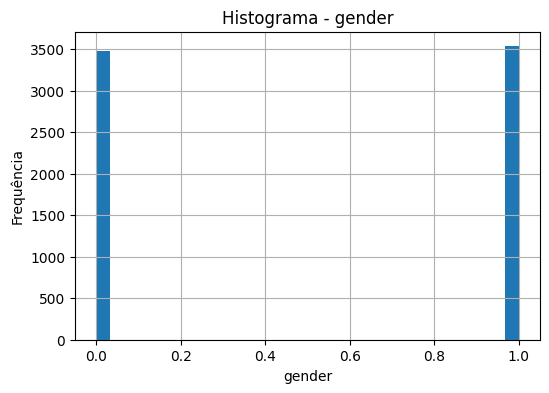

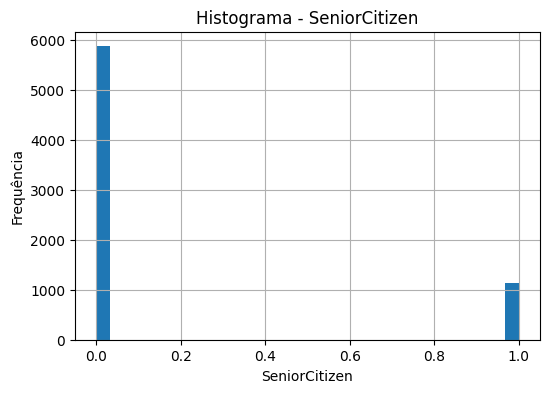

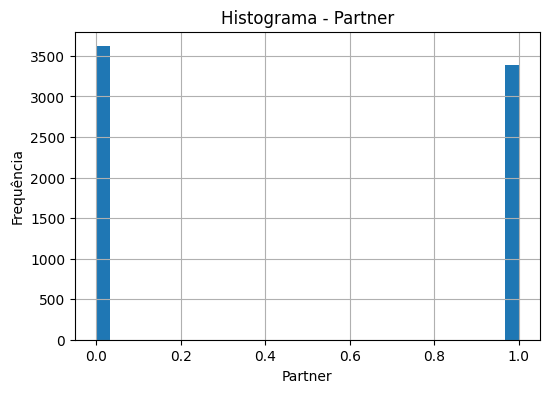

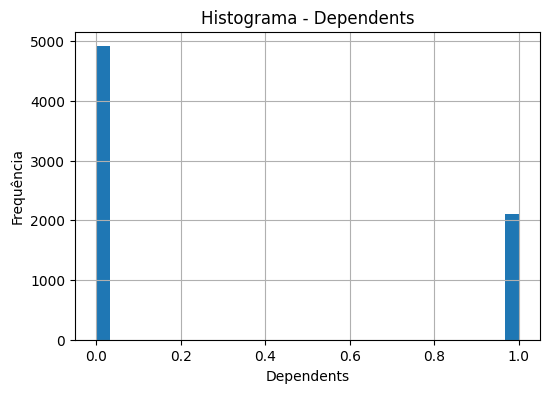

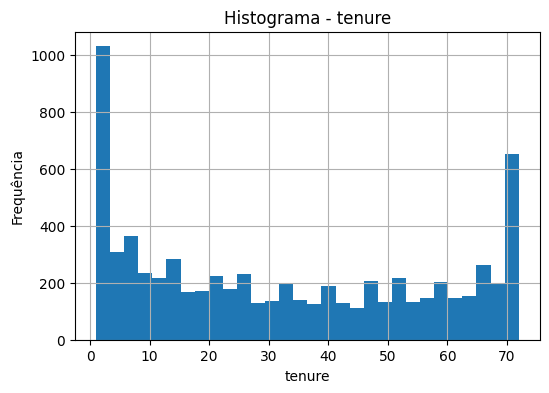

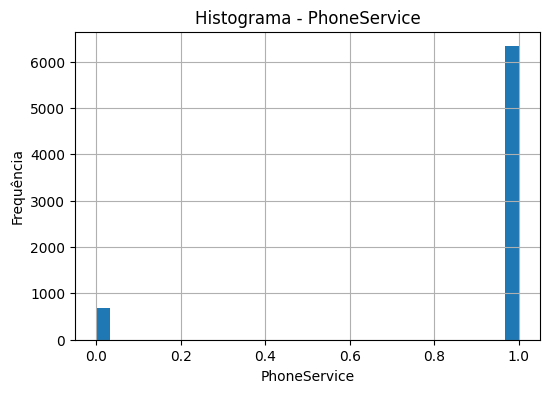

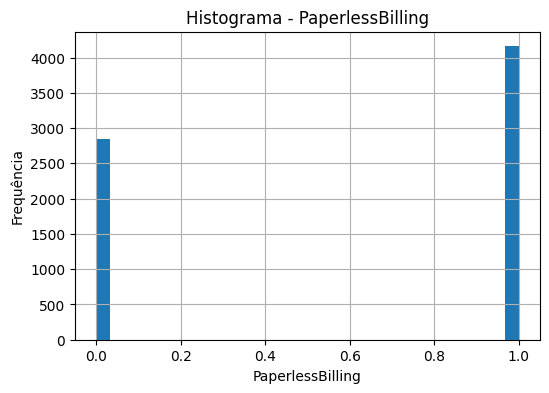

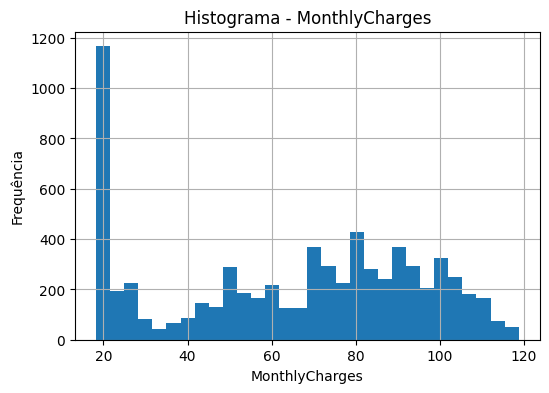

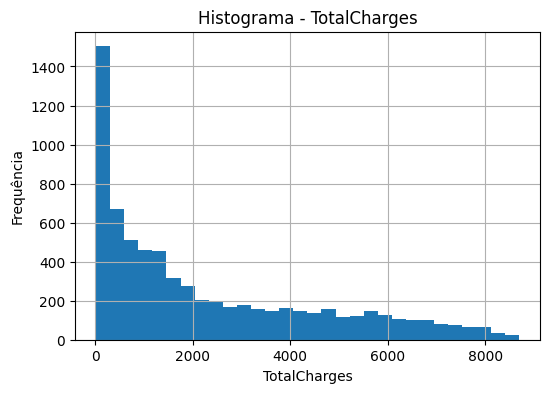

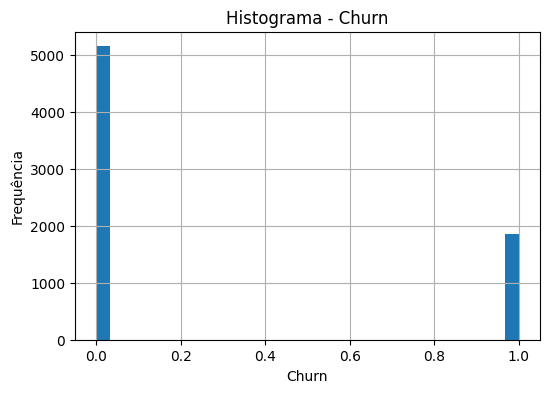

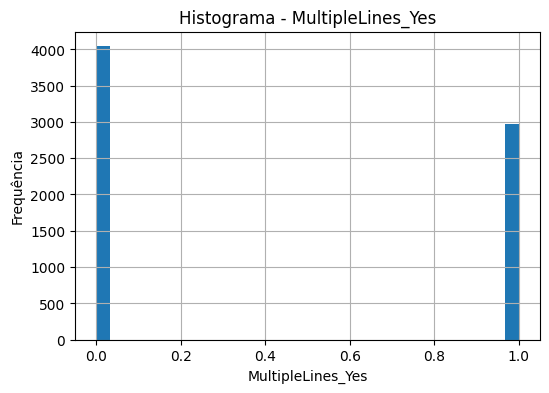

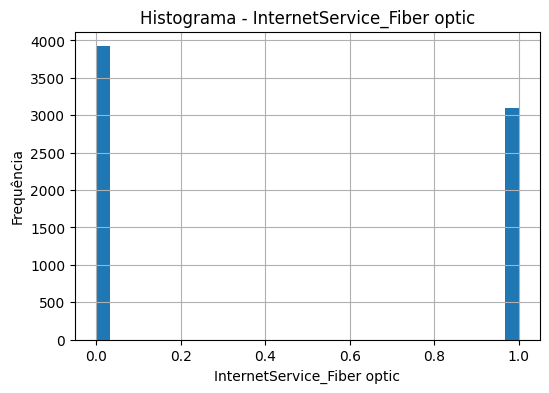

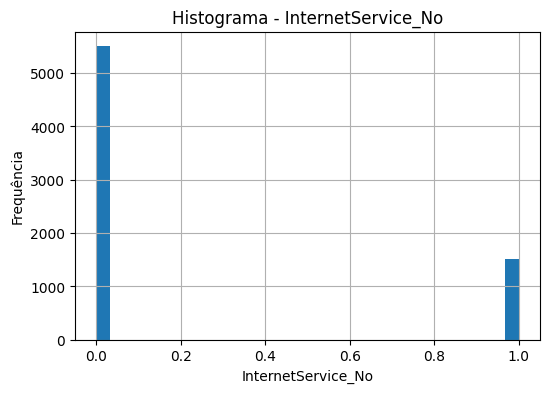

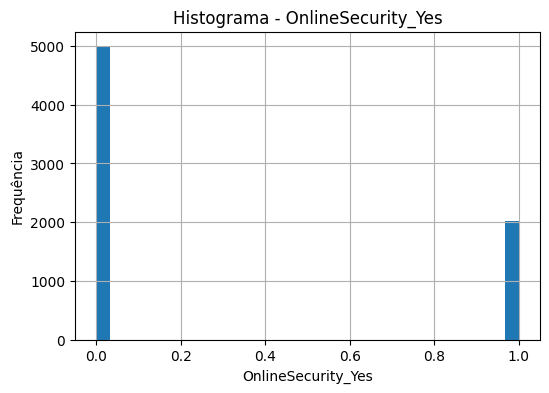

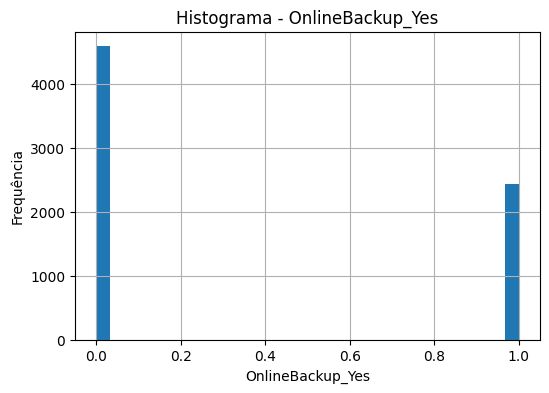

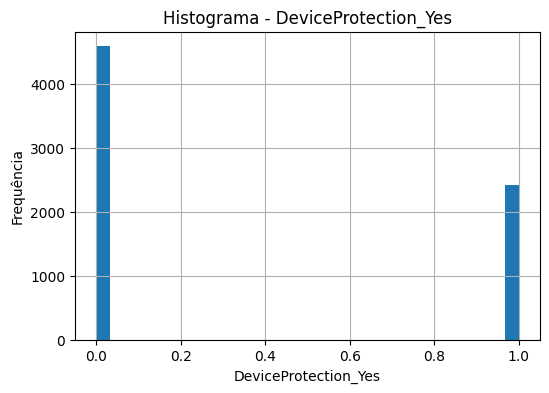

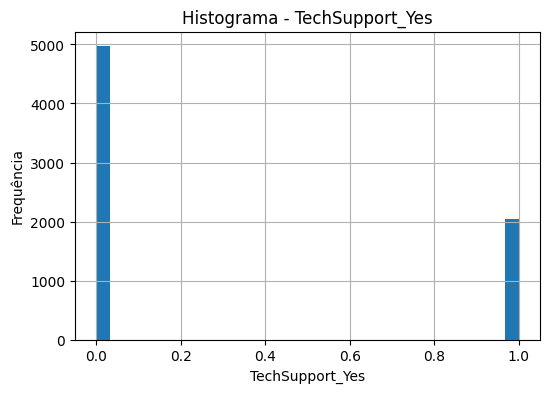

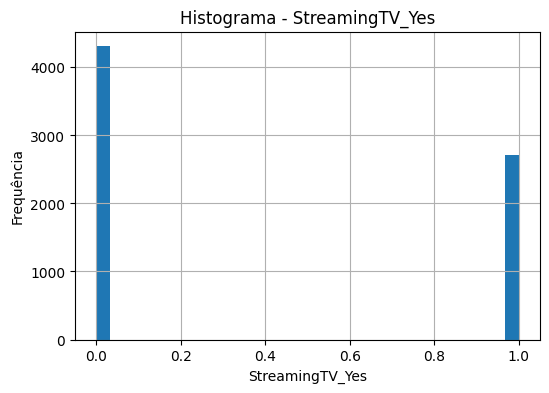

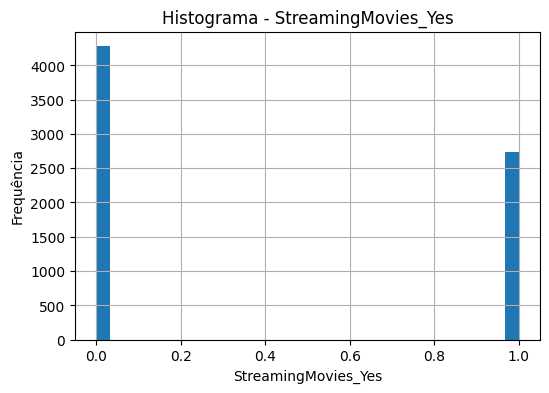

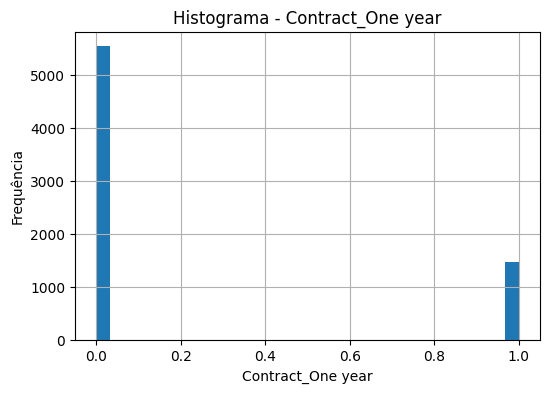

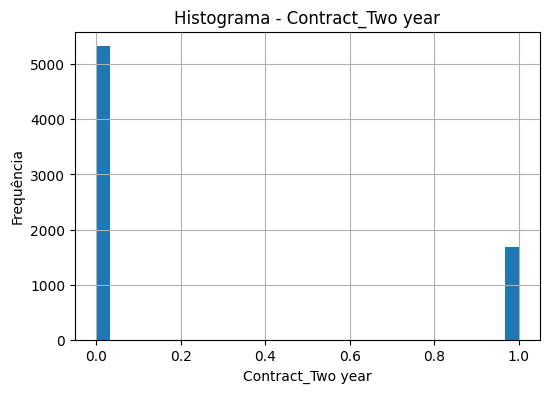

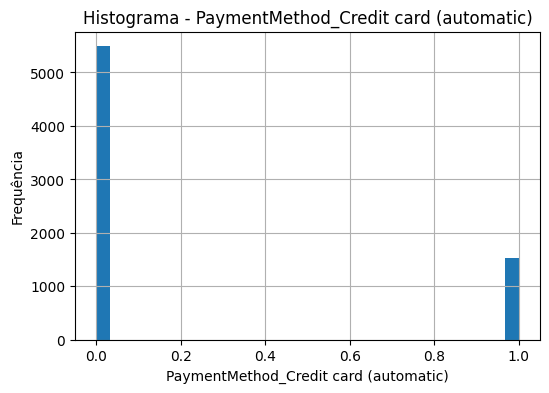

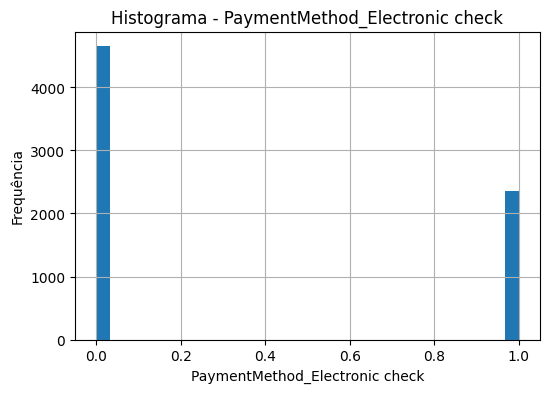

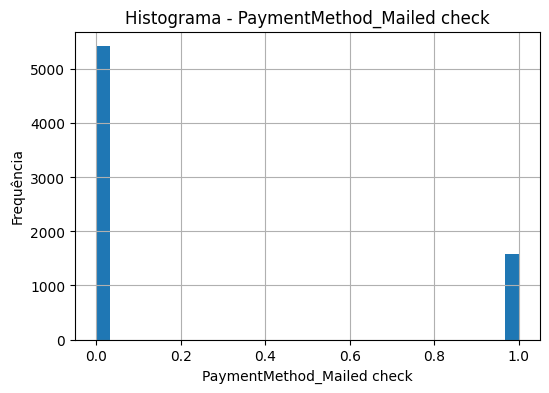

In [93]:
# HISTOGRAMA - variáveis numéricas
import matplotlib.pyplot as plt

for col in matriz.select_dtypes(include='number').columns:
    plt.figure(figsize=(6,4))
    matriz[col].hist(bins=30)
    plt.title(f'Histograma - {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.grid(True)
    plt.show()


## 4.2. Boxplots - variáveis numéricas

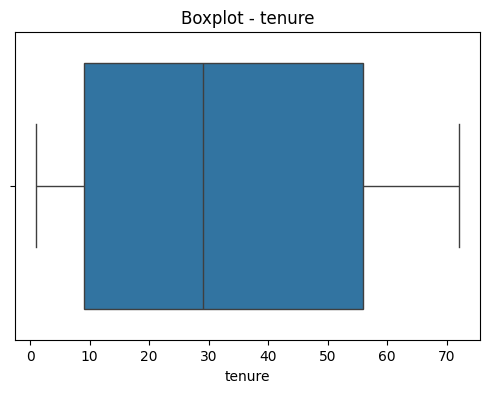

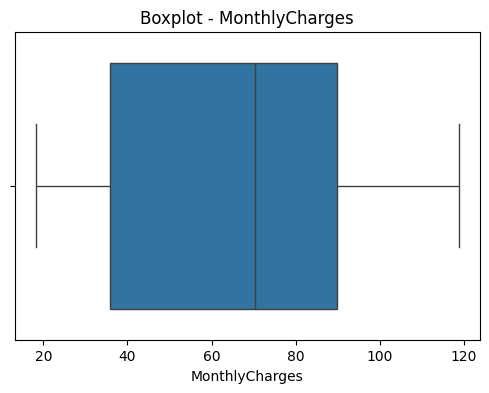

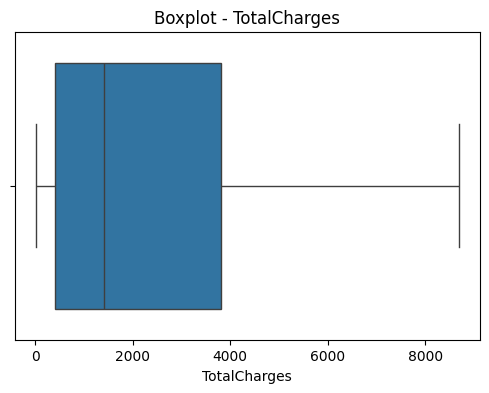

In [94]:
# BOXPLOTS - variáveis numéricas
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar apenas variáveis numéricas com mais de 2 valores distintos
colunas_multivalor = [
    col for col in matriz.select_dtypes(include='number').columns
    if matriz[col].nunique() > 2
]

# Gerar boxplots
for col in colunas_multivalor:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=matriz[col])
    plt.title(f'Boxplot - {col}')
    plt.xlabel(col)
    plt.show()


## 4.3. Densidade/KDE (Kernel Density Estimation)

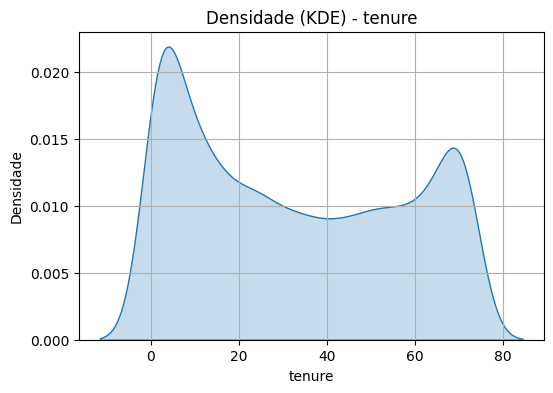

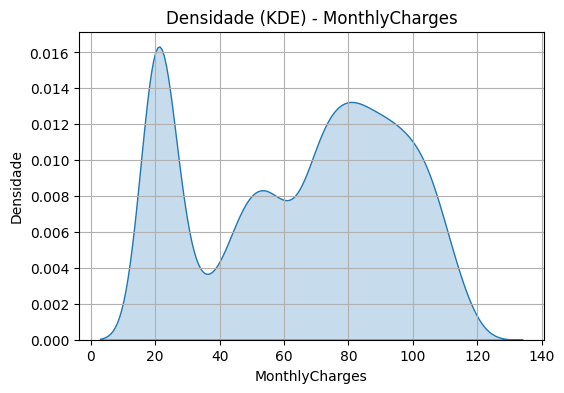

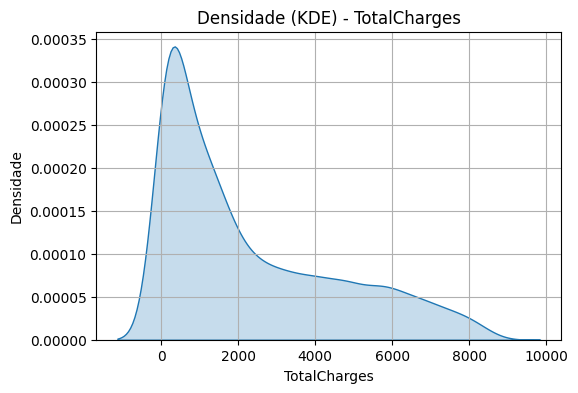

In [95]:
# Densidade / KDE (Kernel Density Estimation)
import seaborn as sns
import matplotlib.pyplot as plt

# Loop apenas nas variáveis numéricas com mais de 2 valores únicos
for col in matriz.select_dtypes(include='number').columns:
    if matriz[col].nunique() > 2:
        plt.figure(figsize=(6, 4))
        sns.kdeplot(data=matriz, x=col, fill=True)
        plt.title(f'Densidade (KDE) - {col}')
        plt.xlabel(col)
        plt.ylabel('Densidade')
        plt.grid(True)
        plt.show()


# 5. Visualizações Bivariadas

2 tipos de visualizações bivariadas são adequadas para esse contexto:

* Gráfico de dispersão (scatterplot): permite visualizar a relação entre duas variáveis numéricas, como a correlação entre MonthlyCharges e TotalCharges. Ele ajuda a identificar padrões, tendências lineares ou não lineares e a presença de outliers entre as variáveis.
* Mapas de calor de correlação (heatmap): mostra a intensidade da correlação entre várias variáveis, geralmente com uma matriz de correlação. Esse tipo de visualização é útil para entender rapidamente quais variáveis possuem uma relação forte ou fraca entre si, como por exemplo, a correlação entre tenure, MonthlyCharges e TotalCharges.

## 5.1. Gráfico de dispersão (scatterplot)

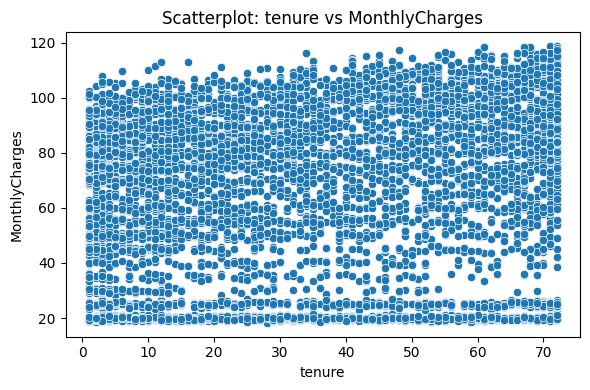

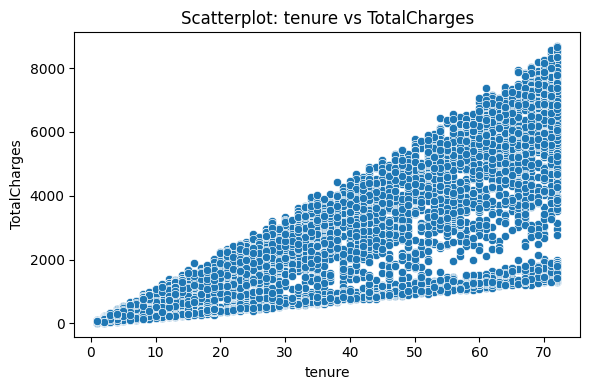

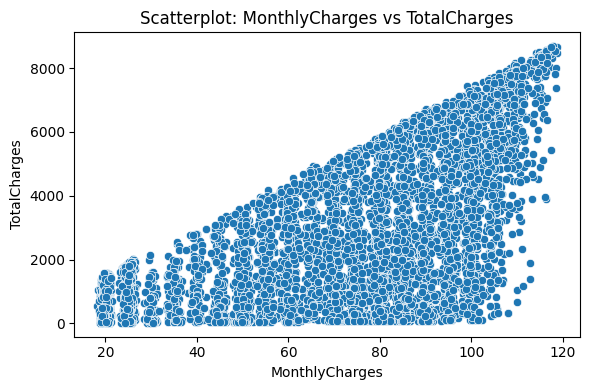

In [96]:
 # Gráfico de Dispersão (Scatterplot) - Relação entre duas variáveis numéricas
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar variáveis numéricas com mais de 2 valores únicos
variaveis_validas = [
    col for col in matriz.select_dtypes(include='number').columns
    if matriz[col].nunique() > 2
]

# Gerar scatterplots entre combinações dessas variáveis
for i in range(len(variaveis_validas)):
    for j in range(i + 1, len(variaveis_validas)):
        plt.figure(figsize=(6,4))
        sns.scatterplot(data=matriz, x=variaveis_validas[i], y=variaveis_validas[j])
        plt.title(f'Scatterplot: {variaveis_validas[i]} vs {variaveis_validas[j]}')
        plt.tight_layout()
        plt.show()

## 5.2. Mapas de calor de correlação (heatmap)

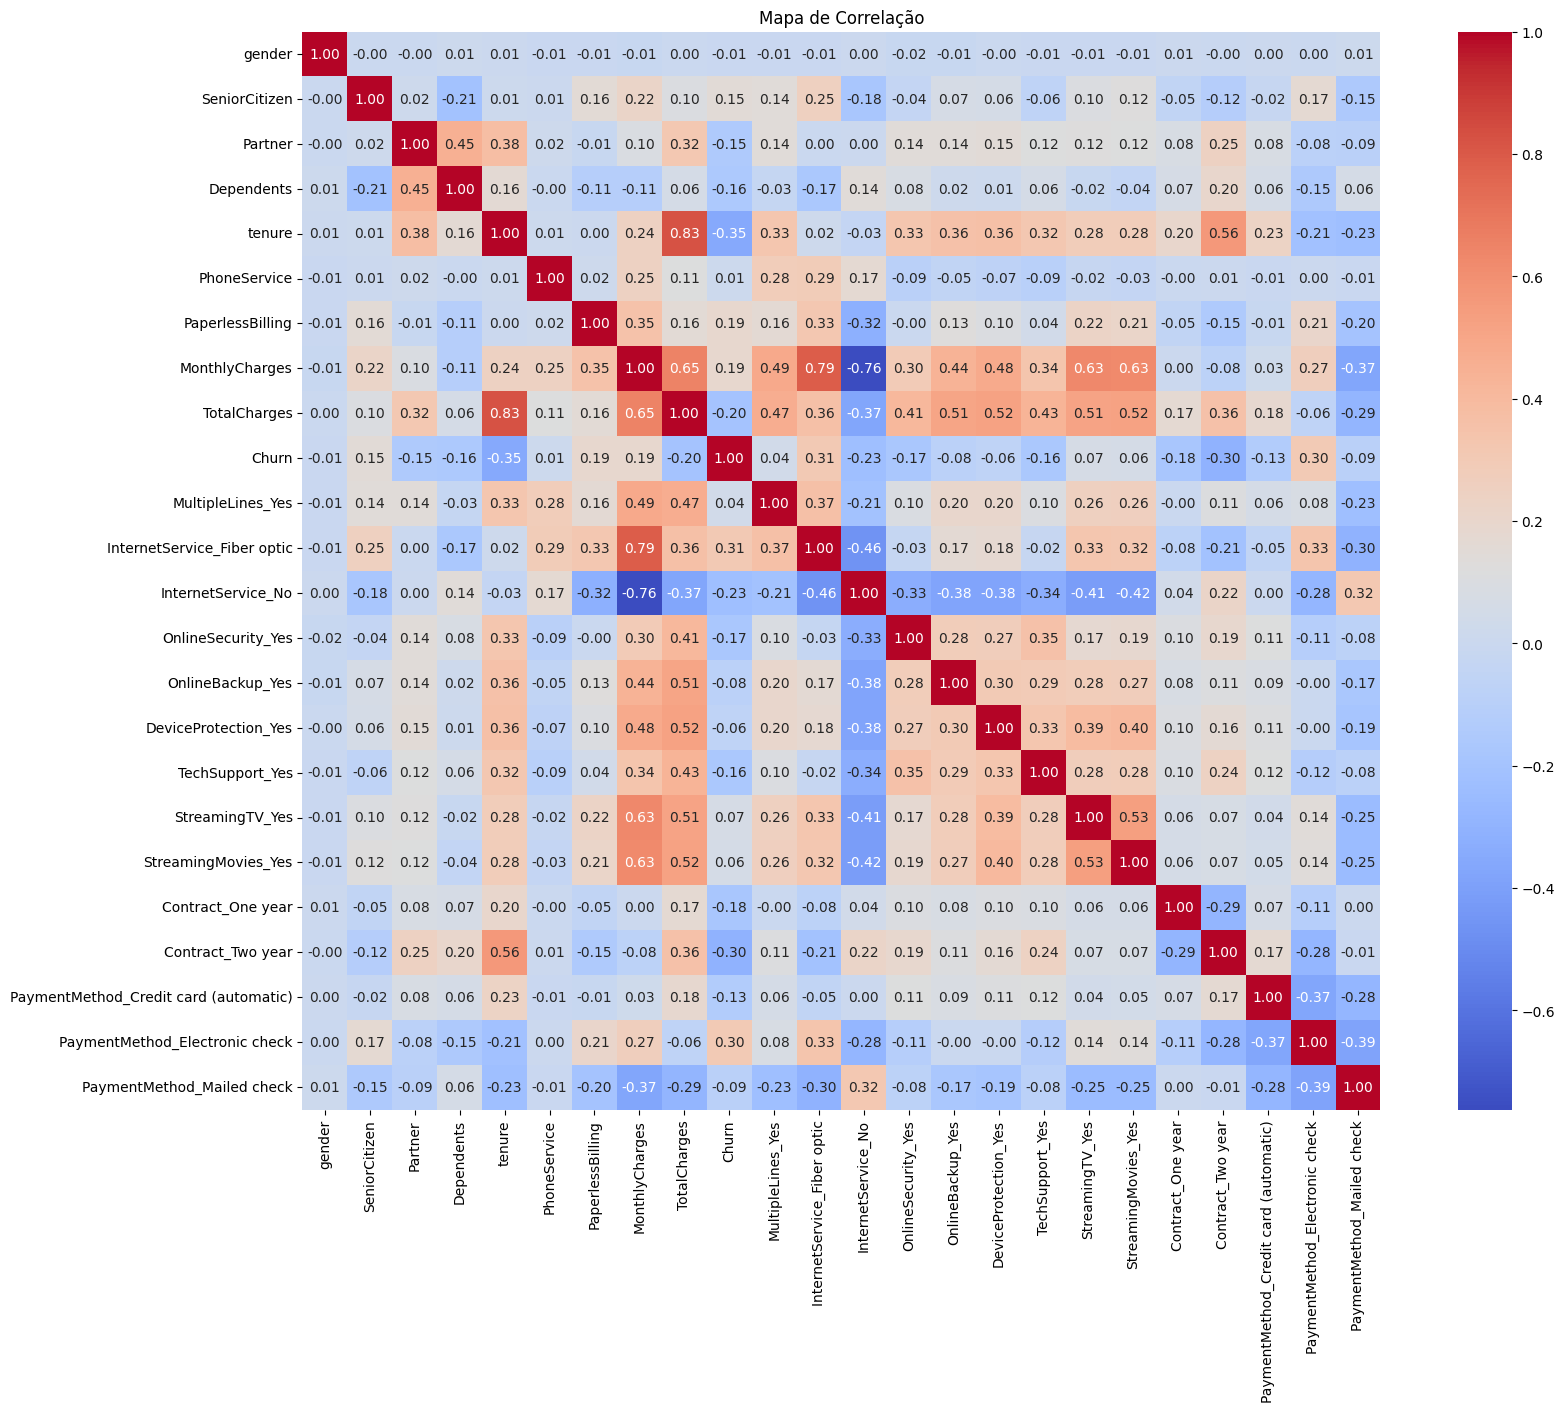

In [97]:
#Mapa de Calor de Correlação (Heatmap): correlações entre variáveis numéricas.
correlacao = matriz.corr()

plt.figure(figsize=(20, 14))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Mapa de Correlação')
plt.show()

# 6. Detecção e remoção de Outliers

## 6.1. Avaliando a distribuição de cada variável

O código tem como objetivo avaliar a distribuição de cada variável numérica no DataFrame, para determinar se elas seguem uma distribuição normal ou se apresentam assimetrias.

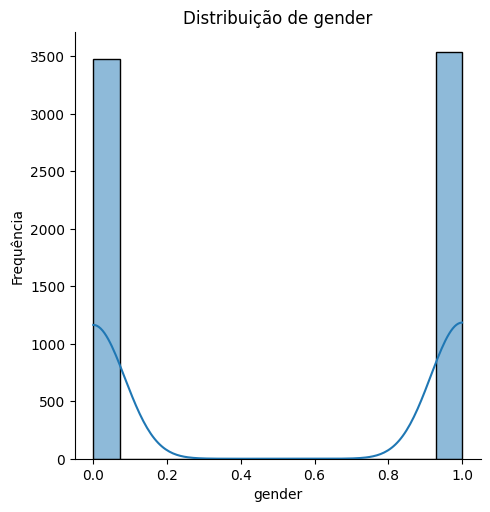

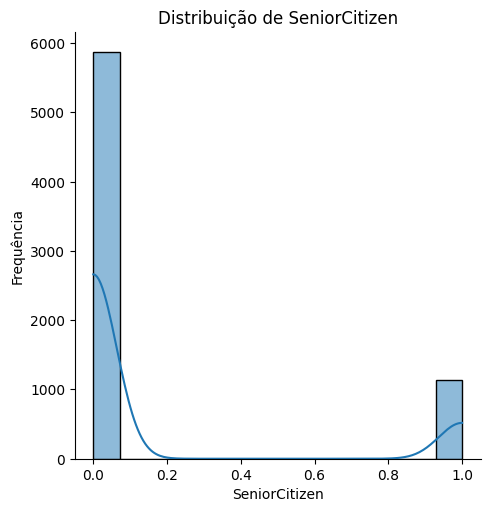

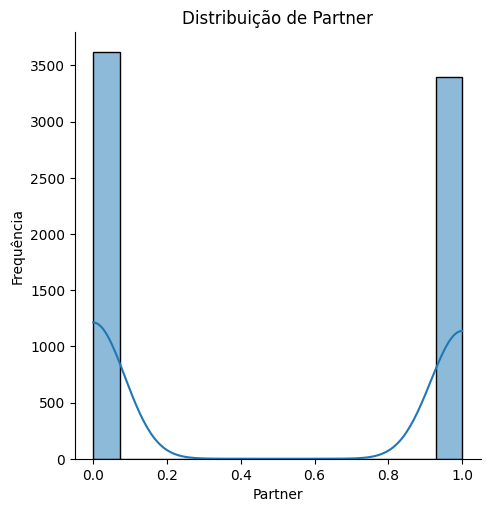

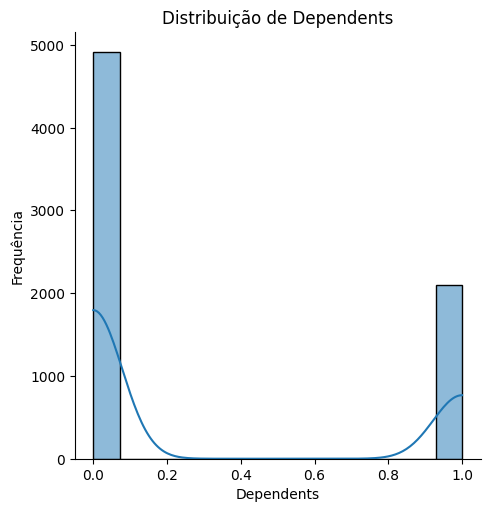

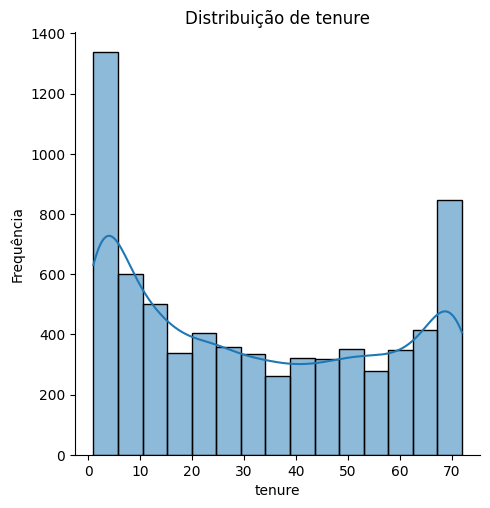

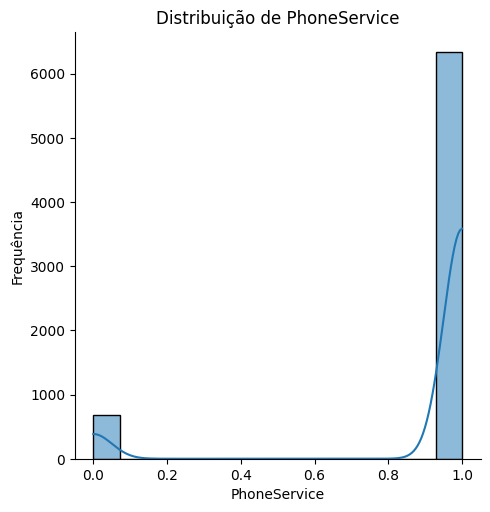

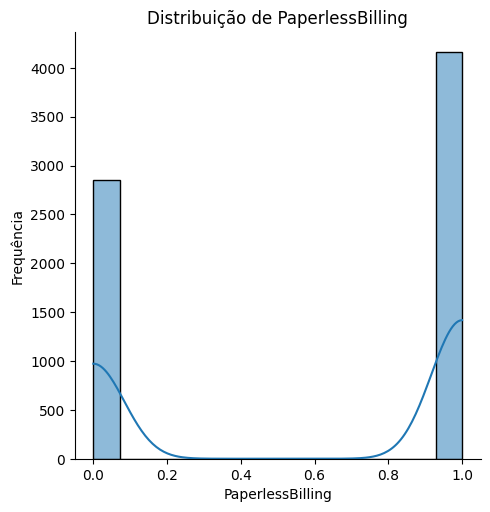

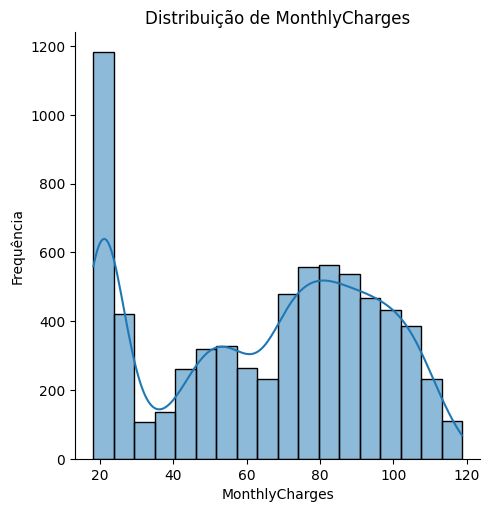

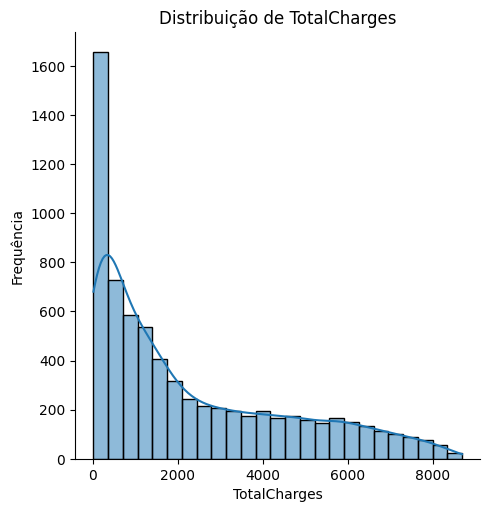

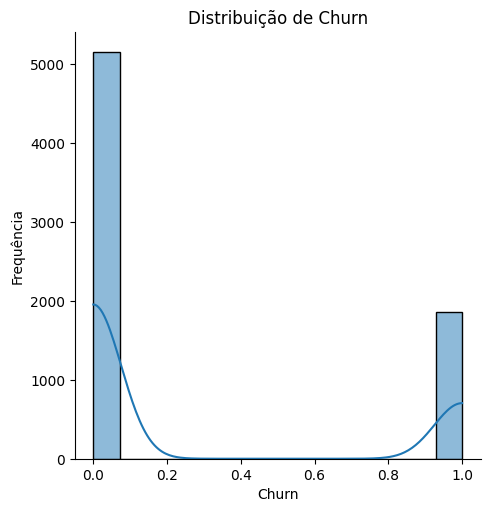

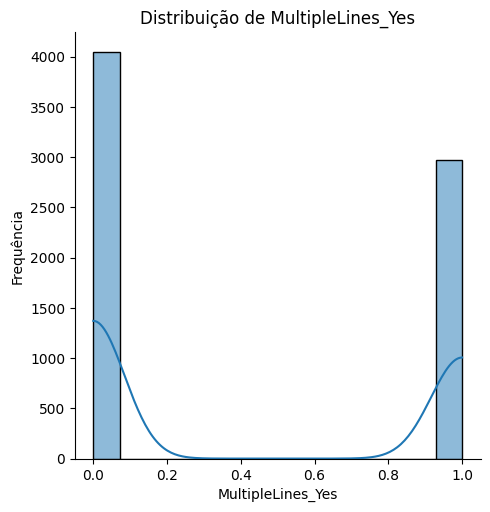

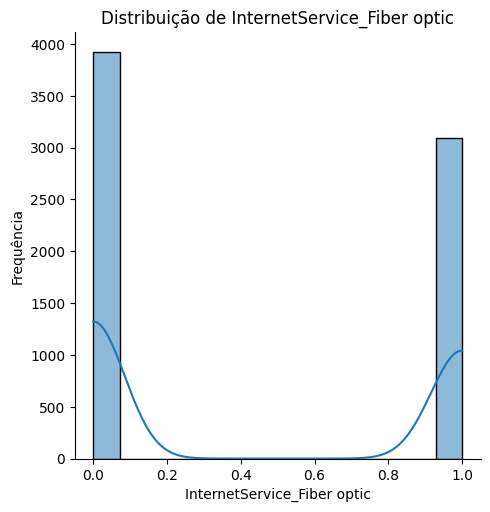

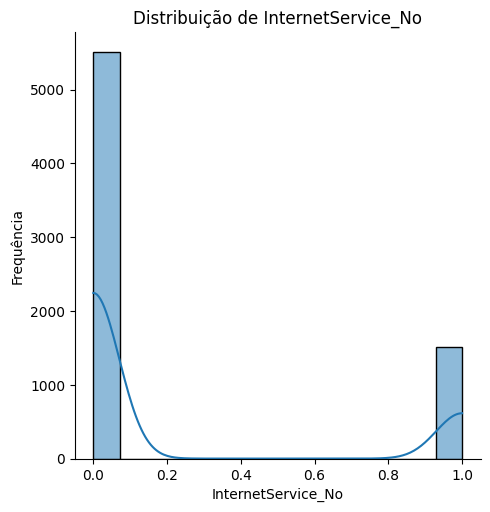

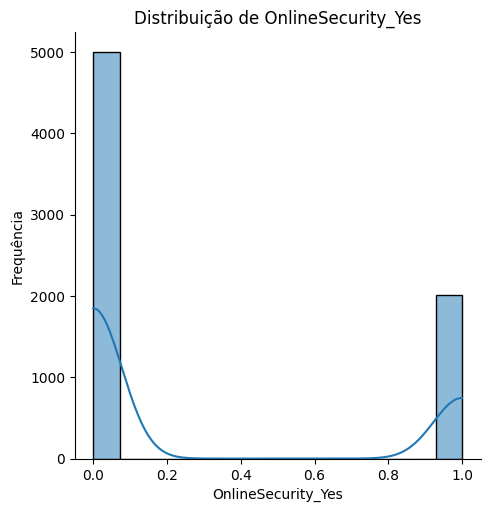

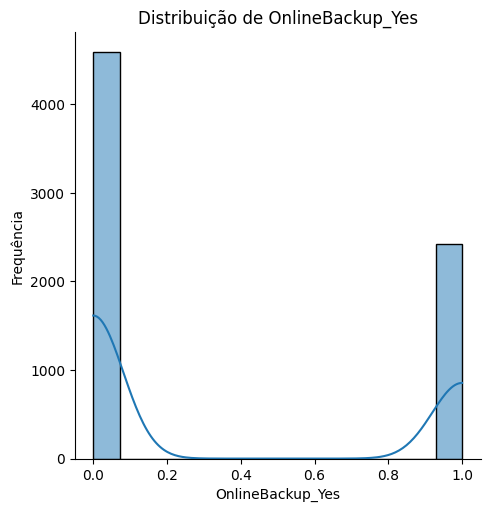

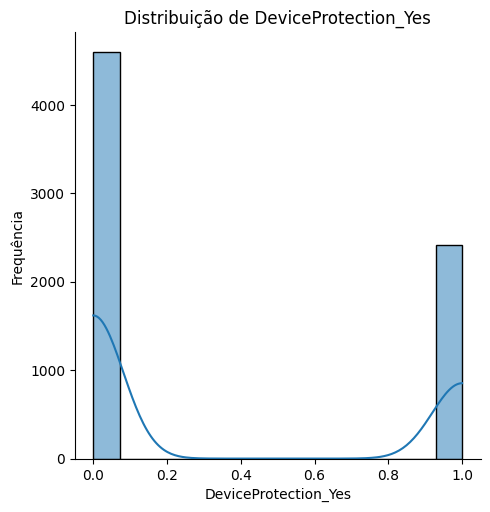

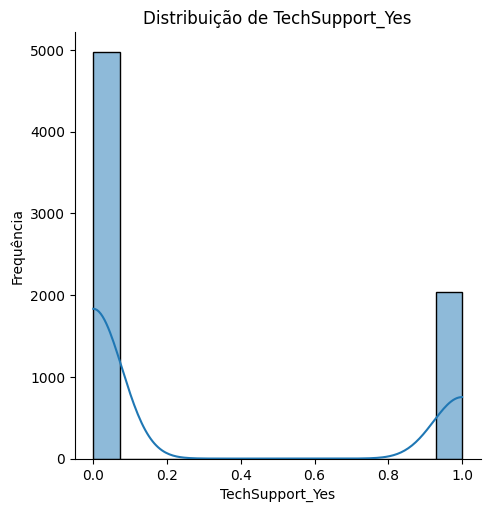

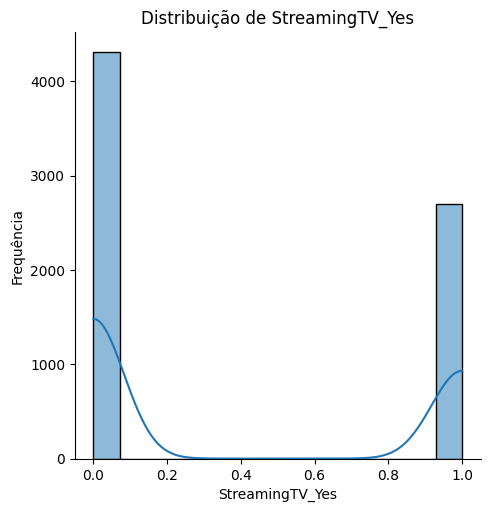

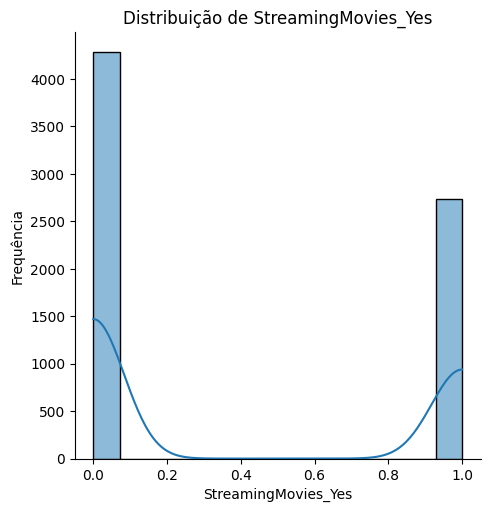

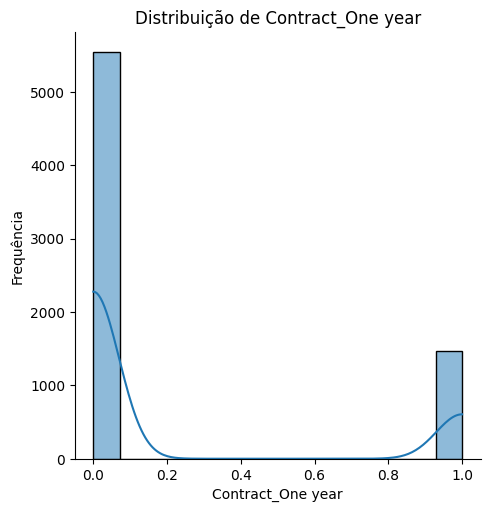

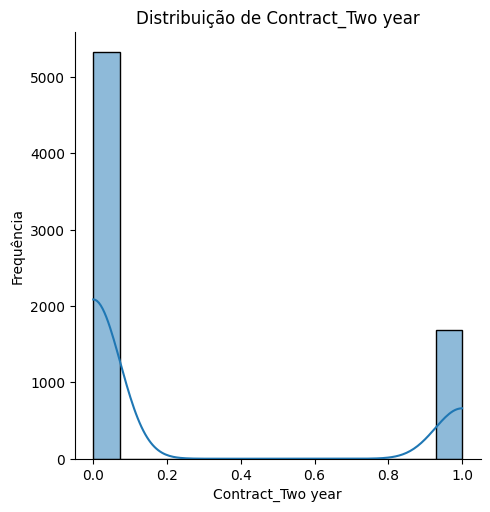

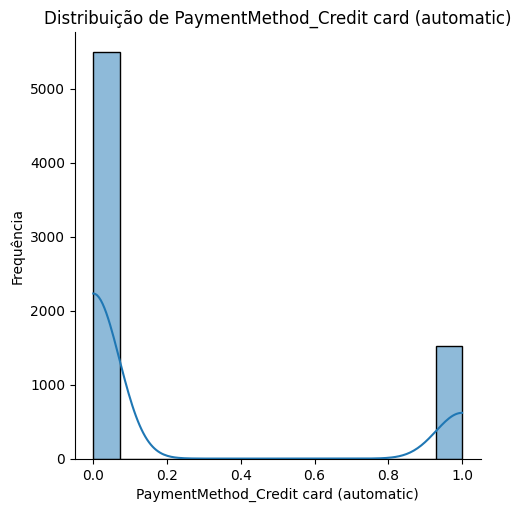

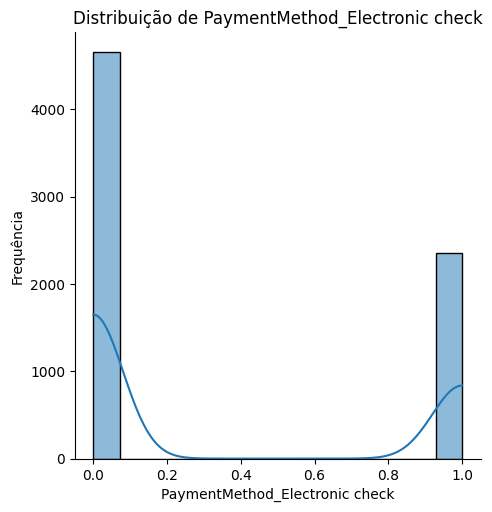

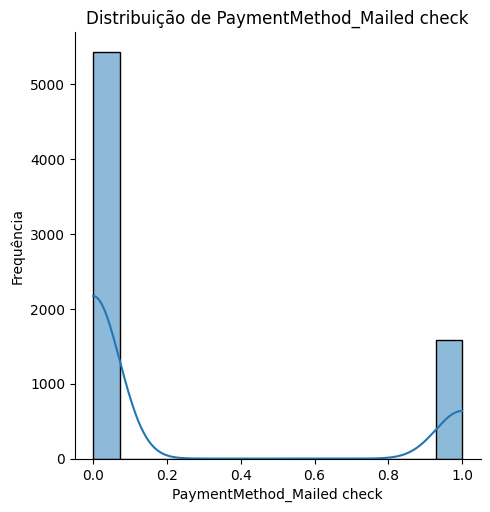


Resumo das distribuições:
                                 Variável  Skewness  p-valor  \
0                                  gender    -0.020    0.000   
1                           SeniorCitizen     1.830    0.000   
2                                 Partner     0.060    0.000   
3                              Dependents     0.880    0.000   
4                                  tenure     0.230    0.000   
5                            PhoneService    -2.720    0.000   
6                        PaperlessBilling    -0.380    0.000   
7                          MonthlyCharges    -0.230    0.000   
8                            TotalCharges     0.960    0.000   
9                                   Churn     1.070    0.000   
10                      MultipleLines_Yes     0.310    0.000   
11            InternetService_Fiber optic     0.240    0.000   
12                     InternetService_No     1.390    0.000   
13                     OnlineSecurity_Yes     0.940    0.000   
14           

In [98]:
# Avaliando a distribuição de cada variável
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import pandas as pd

# Selecionar variáveis numéricas
variaveis_numericas = matriz.select_dtypes(include='number')

# DataFrame para armazenar os resultados
resultado_distribuicao = pd.DataFrame(columns=['Variável', 'Skewness', 'p-valor', 'Tipo de Distribuição'])

# Loop pelas variáveis
for col in variaveis_numericas.columns:
    # Plot
    sns.displot(matriz[col], kde=True)
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.show()

    # Cálculo de skewness
    skew = matriz[col].skew()

    # Teste de normalidade (Shapiro-Wilk, adequado para até 5000 amostras)
    # Reduz o tamanho se houver muitos dados
    amostra = matriz[col].dropna()
    if len(amostra) > 5000:
        amostra = amostra.sample(5000, random_state=42)
    stat, p = shapiro(amostra)

    # Classificação da distribuição
    if p > 0.05 and abs(skew) < 0.5:
        tipo = 'Aproximadamente normal'
    elif skew > 0.5:
        tipo = 'Assimétrica à direita'
    elif skew < -0.5:
        tipo = 'Assimétrica à esquerda'
    else:
        tipo = 'Levemente assimétrica'

    # Adiciona ao DataFrame de resultados
    resultado_distribuicao.loc[len(resultado_distribuicao)] = [col, round(skew, 2), round(p, 4), tipo]

# Exibe a tabela final
print("\nResumo das distribuições:")
print(resultado_distribuicao)


## 6.2. IQR

IQR (Intervalo Interquartil): Mede a dispersão entre o 25º e o 75º percentil.

* Detecção de outliers: Outliers podem distorcer análises estatísticas e a performance de modelos de aprendizado de máquina. Identificar e tratar esses valores é importante, especialmente em modelos que são sensíveis a dados extremos.

* Definição do multiplicador: O multiplicador (3, neste caso) é um fator que determina a quantidade de "força" que você permite para um valor se desviar da média. Quando o multiplicador é maior (por exemplo, 3), você é mais rigoroso ao identificar outliers.

* Tratamento de outliers: Após identificar os outliers, você pode decidir se deseja removê-los, transformá-los ou tratá-los de outra forma, dependendo da natureza dos dados e da análise.

In [99]:
#IQR (Intervalo Interquartil): Mede a dispersão entre o 25º e o 75º percentil. Valores fora de 3 vezes o IQR são considerados outliers.
# Calcular IQR
# IQR (Intervalo Interquartil): Detecta outliers para qualquer variável numérica
import pandas as pd

# Seleciona apenas colunas numéricas
variaveis_numericas = matriz.select_dtypes(include='number')

# Lista para armazenar índices de outliers e contagem por coluna
outlier_indices = set()
contagem_por_coluna = {}
multiplicador = 3
# Loop para cada variável numérica
for coluna in variaveis_numericas.columns:
    Q1 = matriz[coluna].quantile(0.25)
    Q3 = matriz[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - multiplicador * IQR
    limite_superior = Q3 + multiplicador * IQR

    # Encontra índices dos outliers na coluna
    indices = matriz[(matriz[coluna] < limite_inferior) | (matriz[coluna] > limite_superior)].index
    outlier_indices.update(indices)

    # Salva a quantidade de outliers da coluna
    contagem_por_coluna[coluna] = len(indices)

# Converte o set para lista antes de indexar
outliers_iqr = matriz.loc[list(outlier_indices)]

# Impressão dos resultados
print("Quantidade de outliers por coluna (IQR):")
for coluna, qtd in contagem_por_coluna.items():
    print(f"{coluna}: {qtd}")

print(f"\nTotal de linhas com pelo menos um outlier: {len(outliers_iqr)}")

print("\nOutliers detectados com IQR (linhas):")
print(outliers_iqr)




Quantidade de outliers por coluna (IQR):
gender: 0
SeniorCitizen: 1141
Partner: 0
Dependents: 0
tenure: 0
PhoneService: 680
PaperlessBilling: 0
MonthlyCharges: 0
TotalCharges: 0
Churn: 0
MultipleLines_Yes: 0
InternetService_Fiber optic: 0
InternetService_No: 1506
OnlineSecurity_Yes: 0
OnlineBackup_Yes: 0
DeviceProtection_Yes: 0
TechSupport_Yes: 0
StreamingTV_Yes: 0
StreamingMovies_Yes: 0
Contract_One year: 1472
Contract_Two year: 1685
PaymentMethod_Credit card (automatic): 1521
PaymentMethod_Electronic check: 0
PaymentMethod_Mailed check: 1588

Total de linhas com pelo menos um outlier: 5499

Outliers detectados com IQR (linhas):
      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45          

## 6.3.  Isolation Forest

Isolation Forest

* Detecção de Outliers: O objetivo principal do código é identificar instâncias que são consideradas outliers, ou seja, pontos que estão significativamente distantes dos dados "normais". A detecção de outliers é importante porque esses valores podem distorcer análises estatísticas ou influenciar negativamente o desempenho de modelos de aprendizado de máquina.

* Isolation Forest: É uma técnica eficiente para detectar outliers, especialmente quando os dados são grandes ou de alta dimensão. Em comparação com métodos tradicionais como o Z-Score ou IQR, o Isolation Forest é mais eficaz em identificar outliers em dados que não seguem uma distribuição normal ou que são complexos.

* Análise Complementar: A comparação entre os valores dos outliers e os valores normais usando o IQR serve para verificar se os outliers identificados estão realmente fora do intervalo esperado e se esse comportamento é consistente com a definição clássica de outlier.

In [100]:
from sklearn.ensemble import IsolationForest
import pandas as pd
import numpy as np

# Seleciona apenas colunas numéricas
variaveis_numericas = matriz.select_dtypes(include='number')

# Inicializa e treina o modelo
# 0.02 -> 5% de outliers
iso_forest = IsolationForest(contamination=0.02, random_state=42)
outlier_flags = iso_forest.fit_predict(variaveis_numericas)

# Adiciona a predição ao DataFrame (-1 = outlier)
matriz['Outlier_IF'] = outlier_flags

# Total de instâncias com outliers
total_outliers = (outlier_flags == -1).sum()
print(f"Total de instâncias com outliers (Isolation Forest): {total_outliers} de {len(matriz)}")

# Análise por coluna
print("\nNúmero de outliers detectados por variável (Isolation Forest):")
col_outliers = {}
for col in variaveis_numericas.columns:
    # Compara distribuição dos valores da variável entre outliers e não-outliers
    outlier_vals = matriz.loc[matriz['Outlier_IF'] == -1, col]
    normal_vals = matriz.loc[matriz['Outlier_IF'] == 1, col]

    # Conta quantos outliers estão fora do intervalo interquartil da parte "normal"
    q1 = normal_vals.quantile(0.25)
    q3 = normal_vals.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    count = ((outlier_vals < lower) | (outlier_vals > upper)).sum()
    col_outliers[col] = count
    print(f"{col}: {count} instâncias")

# (Opcional) Ver gráfico ou salvar como DataFrame
# pd.Series(col_outliers).sort_values(ascending=False).plot(kind='barh')


Total de instâncias com outliers (Isolation Forest): 141 de 7010

Número de outliers detectados por variável (Isolation Forest):
gender: 0 instâncias
SeniorCitizen: 57 instâncias
Partner: 0 instâncias
Dependents: 0 instâncias
tenure: 0 instâncias
PhoneService: 85 instâncias
PaperlessBilling: 0 instâncias
MonthlyCharges: 0 instâncias
TotalCharges: 0 instâncias
Churn: 0 instâncias
MultipleLines_Yes: 0 instâncias
InternetService_Fiber optic: 0 instâncias
InternetService_No: 0 instâncias
OnlineSecurity_Yes: 0 instâncias
OnlineBackup_Yes: 0 instâncias
DeviceProtection_Yes: 0 instâncias
TechSupport_Yes: 0 instâncias
StreamingTV_Yes: 0 instâncias
StreamingMovies_Yes: 0 instâncias
Contract_One year: 83 instâncias
Contract_Two year: 39 instâncias
PaymentMethod_Credit card (automatic): 54 instâncias
PaymentMethod_Electronic check: 0 instâncias
PaymentMethod_Mailed check: 46 instâncias


## 6.4. Remoção dos outliers

O código que serve para filtrar e remover as instâncias identificadas como outliers do DataFrame, após a aplicação do modelo Isolation Forest.

In [101]:
# Filtra apenas as linhas normais (não outliers)
matriz_sem_outliers = matriz[matriz['Outlier_IF'] == 1].drop(columns='Outlier_IF').reset_index(drop=True)

print(f"Número de instâncias após remoção de outliers: {len(matriz_sem_outliers)}")


Número de instâncias após remoção de outliers: 6869


# 7. Salvar a matriz

Salva a matriz após todo o tratamento como matriz_EDA

In [102]:
matriz_sem_outliers.to_csv('../data/matriz_EDA.csv', index=False)

# Fazer o download do arquivo CSV
matriz_final_EDA = pd.read_csv('../data/matriz_EDA.csv')

matriz_final_EDA.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.850,29.850,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.950,1889.500,0,...,0,1,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.850,108.150,1,...,1,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.300,1840.750,0,...,0,1,1,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.700,151.650,1,...,0,0,0,0,0,0,0,0,1,0
